<a href="https://colab.research.google.com/github/PRAKASHMS7/Phishing-Detection-By-Using-ML-Models/blob/main/Wrapper_Based_Approach/BACKWARD_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('/content/All.csv')  # Replace with your actual file path

# Separate numeric and non-numeric data
numeric_data = data.select_dtypes(include=[np.number])

# Clean the numeric data
cleaned_numeric_data = numeric_data.replace([np.inf, -np.inf], np.nan).fillna(numeric_data.mean())
cleaned_numeric_data = cleaned_numeric_data.clip(lower=-1e6, upper=1e6)

# Split the data into features and target variable
X = cleaned_numeric_data.iloc[:, :-1]  # Features
y = cleaned_numeric_data.iloc[:, -1]   # Target (assumed continuous)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize Backward Feature Selector
# You might need to specify the number of features to select, e.g., n_features_to_select=5
selector = SequentialFeatureSelector(model, n_features_to_select='auto', direction='backward', scoring='r2', cv=5)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the optimal number of features selected
n_features_selected = selector.get_support().sum()  # Number of features selected
print(f"Number of features selected: {n_features_selected}")

# Get the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Transform the features with the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit the model on the selected features
model.fit(X_train_selected, y_train)

# Evaluate the model with selected features
score = model.score(X_test_selected, y_test)
print(f"Model R-squared with selected features: {score:.4f}")


Number of features selected: 39
Selected Features: Index(['Querylength', 'path_token_count', 'avgpathtokenlen', 'tld', 'dld_path',
       'dld_getArg', 'urlLen', 'domainlength', 'subDirLen', 'this.fileExtLen',
       'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio',
       'NumberofDotsinURL', 'LongestVariableValue', 'URL_DigitCount',
       'URL_Letter_Count', 'Directory_LetterCount', 'Filename_LetterCount',
       'Query_LetterCount', 'LongestPathTokenLength',
       'Domain_LongestWordLength', 'sub-Directory_LongestWordLength',
       'Arguments_LongestWordLength', 'URLQueries_variable', 'spcharUrl',
       'delimeter_path', 'delimeter_Count', 'NumberRate_URL',
       'NumberRate_Domain', 'NumberRate_Extension', 'NumberRate_AfterPath',
       'SymbolCount_Directoryname', 'SymbolCount_FileName',
       'SymbolCount_Extension', 'Entropy_URL', 'Entropy_Filename',
       'Entropy_Extension'],
      dtype='object')
Model R-squared with selected features: 0.9879


Accuracy of the Model with backward Selected Features: 76.16%
Overall Precision: 76.05%
Overall F1 Score: 75.96%

Classification Report:
              precision    recall  f1-score   support

  Defacement       0.78      0.76      0.77      1628
      benign       0.78      0.86      0.82      1526
     malware       0.69      0.60      0.64      1332
    phishing       0.74      0.82      0.78      1497
        spam       0.80      0.75      0.78      1359

    accuracy                           0.76      7342
   macro avg       0.76      0.76      0.76      7342
weighted avg       0.76      0.76      0.76      7342



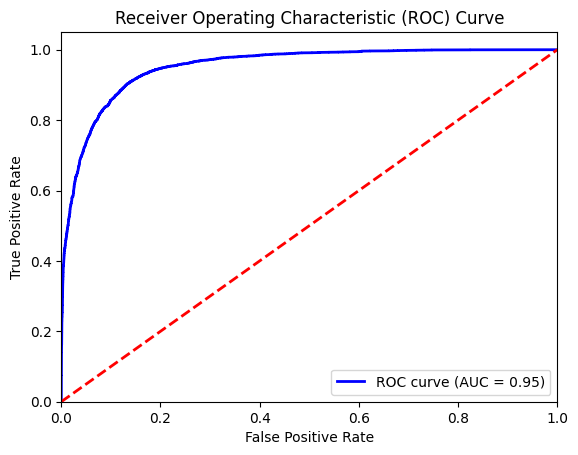

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('/content/All.csv')

# List of backward-selected features
backward_selected_features = [
    'Querylength', 'path_token_count', 'avgpathtokenlen', 'tld', 'dld_path', 'dld_getArg', 'urlLen',
    'domainlength', 'subDirLen', 'this.fileExtLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio',
    'domainUrlRatio', 'NumberofDotsinURL', 'LongestVariableValue', 'URL_DigitCount', 'URL_Letter_Count',
    'Directory_LetterCount', 'Filename_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
    'Domain_LongestWordLength', 'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
    'URLQueries_variable', 'spcharUrl', 'delimeter_path', 'delimeter_Count', 'NumberRate_URL',
    'NumberRate_Domain', 'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_Directoryname',
    'SymbolCount_FileName', 'SymbolCount_Extension', 'Entropy_URL', 'Entropy_Filename', 'Entropy_Extension'
]

# Check if the features exist in the dataset
available_features = [feature for feature in backward_selected_features if feature in data.columns]

# Define X (features) and y (target)
X = data[available_features]
y = data['URL_Type_obf_Type']  # Ensure this is your actual target column

# Handle missing values by imputing with the mean
X = X.fillna(X.mean())

# Replace infinite values with NaN, then fill with column mean
X = X.replace([float('inf'), float('-inf')], float('nan'))
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=model.classes_)  # Binarize the true labels
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for the overall model by treating all classes as positive
# Get the probabilities of the positive class (1) for all classes
y_prob_positive = y_prob.ravel()  # Flatten the predicted probabilities
y_test_combined = y_test_binarized.ravel()  # Flatten the true labels

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_combined, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Display the results
print(f"Accuracy of the Model with backward Selected Features: {accuracy * 100:.2f}%")
print(f"Overall Precision: {precision * 100:.2f}%")
print(f"Overall F1 Score: {f1 * 100:.2f}%\n")
print("Classification Report:")
print(report)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
